In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot  as plt


In [11]:
import os

df = pd.read_csv(os.path.join(os.path.abspath(''), "datasets/housing/housing.csv"))
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [12]:
# df = df.drop(["longitude", "latitude", "ocean_proximity"], axis=1)

In [13]:
df.describe()

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [14]:
df.ocean_proximity = pd.Categorical(df.ocean_proximity)
df['ocean_proximity'] = df.ocean_proximity.cat.codes
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[20640 rows x 10 columns]

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]]).ravel()

In [29]:
df.describe()

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20640.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  ocean_proximity  
count        20640.000000     20640.000000  
mean        206855.816909         1.165843  
std         115395.615874         1.420662  
min          14999.000000         0.000000  
25%         119600.000000         0.000000  
50%         179700.000000         1.000000  
75%         264725.000000         1.000000  
max         500001.000000         4.000000

In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,max_depth=30)
clf.fit(train.drop("median_house_value", axis=1), train["median_house_value"])

y_pred = clf.predict(test.drop("median_house_value", axis=1))
y_act = test["median_house_value"].values

# y_pred = pow(10 , y_pred)
# y_act = pow(10 , y_act)

print(y_pred)
print(y_act)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_act, y_pred)
print(f"MSE : {lin_mse}")

from sklearn.metrics import r2_score 
R_square = r2_score(y_act, y_pred)
print('Coefficient of Determination', R_square) 

from sklearn.metrics import explained_variance_score
result=explained_variance_score(y_act,y_pred,multioutput='uniform_average')
print('explained_variance_score', result) 

[183351.34090909 120611.         131952.         ...  81205.
 218099.01       189962.        ]
[193800.  88100. 142400. ... 175000. 201600. 168300.]
MSE : 2386205420.7862535
Coefficient of Determination 0.8160572618804804
explained_variance_score 0.8160755132690167


<Axes: xlabel='median_income', ylabel='median_house_value'>

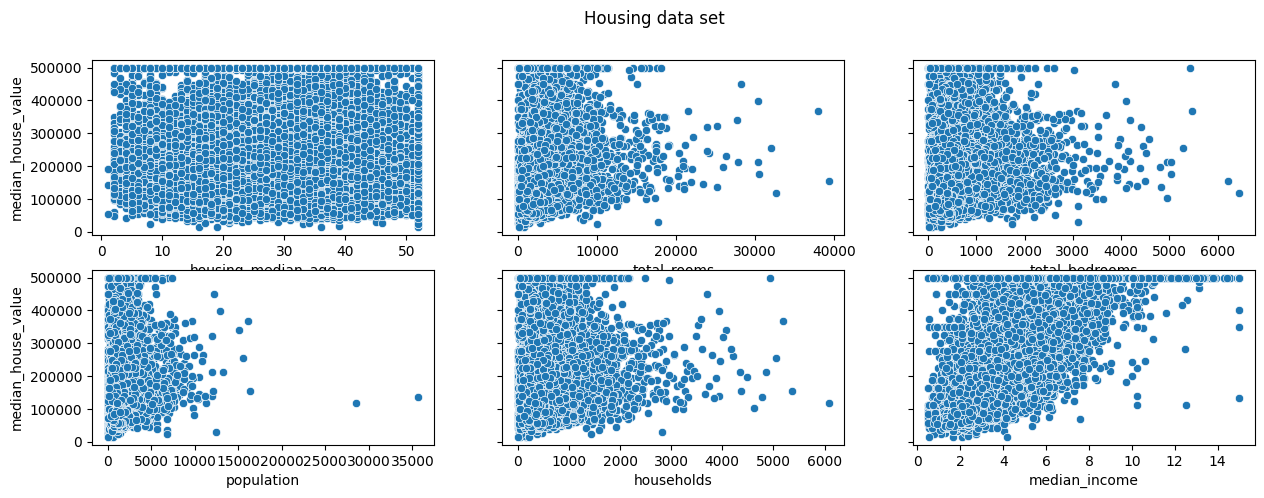

In [17]:

fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Housing data set')

sns.scatterplot( df, ax = axes[0][0], y='median_house_value', x="housing_median_age")
sns.scatterplot(df, ax = axes[0][1], y='median_house_value', x="total_rooms")
sns.scatterplot(df, ax = axes[0][2], y='median_house_value', x="total_bedrooms")
sns.scatterplot(df, ax = axes[1][0], y='median_house_value', x="population")
sns.scatterplot(df, ax = axes[1][1], y='median_house_value', x="households")
sns.scatterplot(df, ax = axes[1][2], y='median_house_value', x="median_income")

<Axes: xlabel='median_house_value', ylabel='Count'>

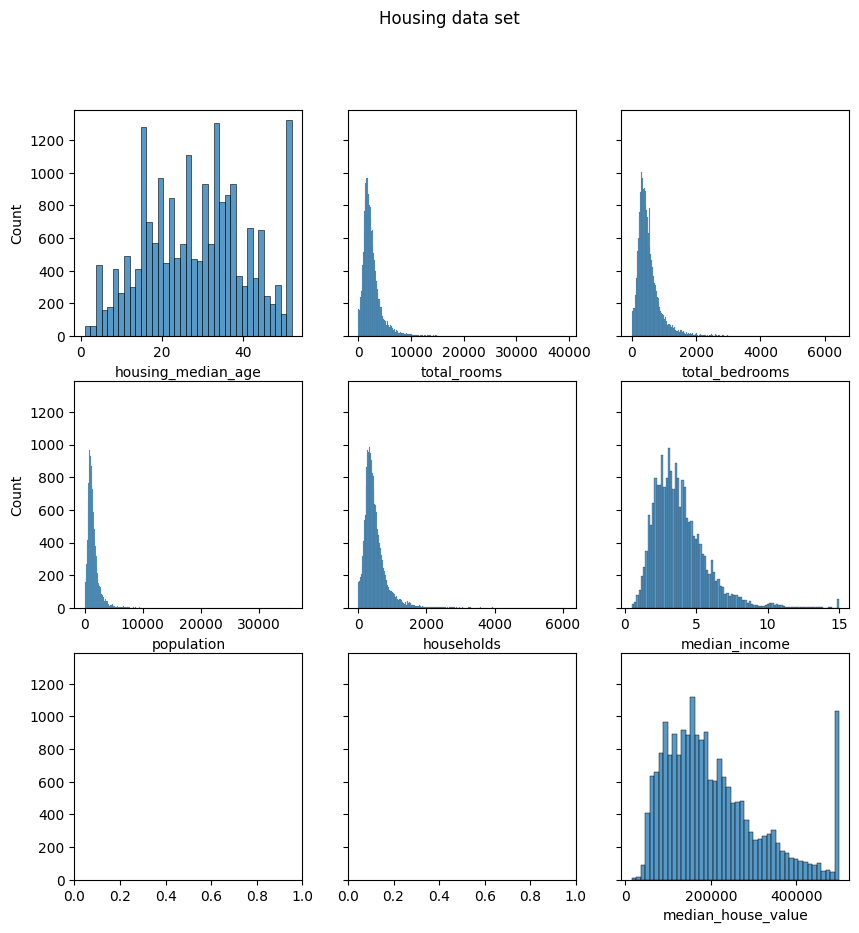

In [18]:

fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharey=True)
fig.suptitle('Housing data set')

sns.histplot(df["housing_median_age"], ax = axes[0][0])
sns.histplot(df["total_rooms"], ax = axes[0][1])
sns.histplot(df["total_bedrooms"], ax = axes[0][2])
sns.histplot(df["population"], ax = axes[1][0])
sns.histplot(df["households"], ax = axes[1][1])
sns.histplot(df["median_income"], ax = axes[1][2])
sns.histplot(df["median_house_value"], ax = axes[2][2])


<Axes: xlabel='median_house_value', ylabel='Count'>

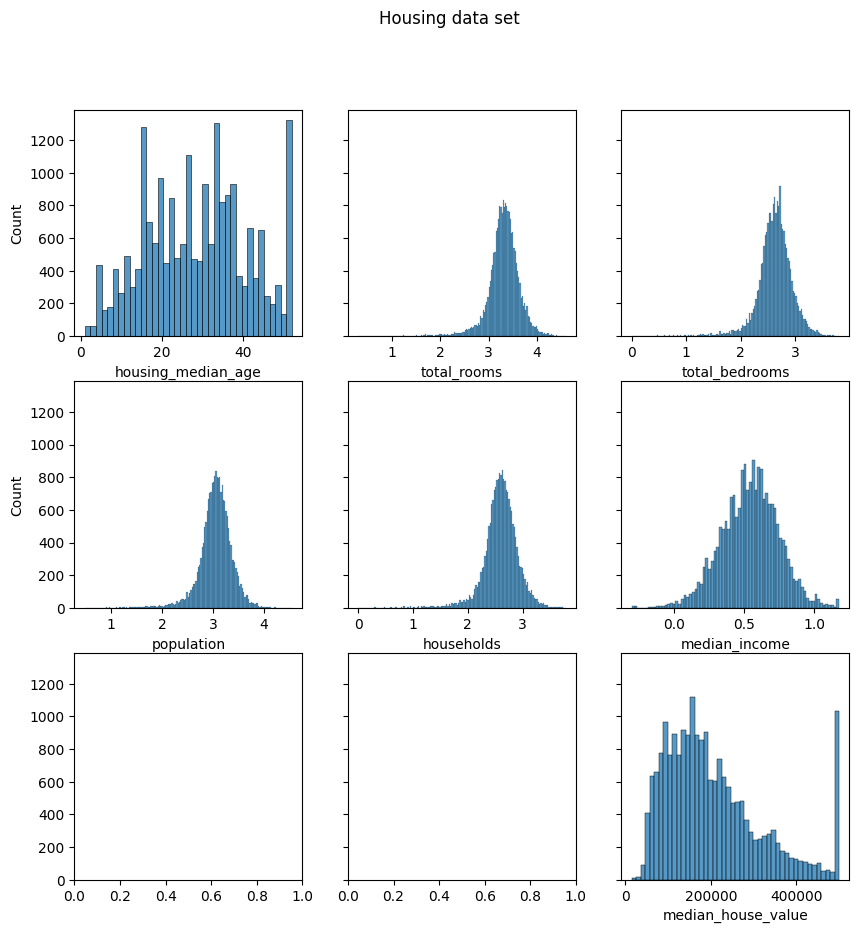

In [19]:
#http://fmwww.bc.edu/repec/bocode/t/transint.html

#To reduce data skewness (in this case right skewness)

df_skew_corrected = df.copy()
df_skew_corrected["total_rooms"] = np.log10(df_skew_corrected["total_rooms"])
df_skew_corrected["total_bedrooms"] = np.log10(df_skew_corrected["total_bedrooms"])
df_skew_corrected["population"] = np.log10(df_skew_corrected["population"])
df_skew_corrected["households"] = np.log10(df_skew_corrected["households"])
df_skew_corrected["median_income"] = np.log10(df_skew_corrected["median_income"])
# df_skew_corrected["median_house_value"] = np.log10(df_skew_corrected["median_house_value"])


fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharey=True)
fig.suptitle('Housing data set')

sns.histplot(df_skew_corrected["housing_median_age"], ax = axes[0][0])
sns.histplot(df_skew_corrected["total_rooms"], ax = axes[0][1])
sns.histplot(df_skew_corrected["total_bedrooms"], ax = axes[0][2])
sns.histplot(df_skew_corrected["population"], ax = axes[1][0])
sns.histplot(df_skew_corrected["households"], ax = axes[1][1])
sns.histplot(df_skew_corrected["median_income"], ax = axes[1][2])
sns.histplot(df_skew_corrected["median_house_value"], ax = axes[2][2])

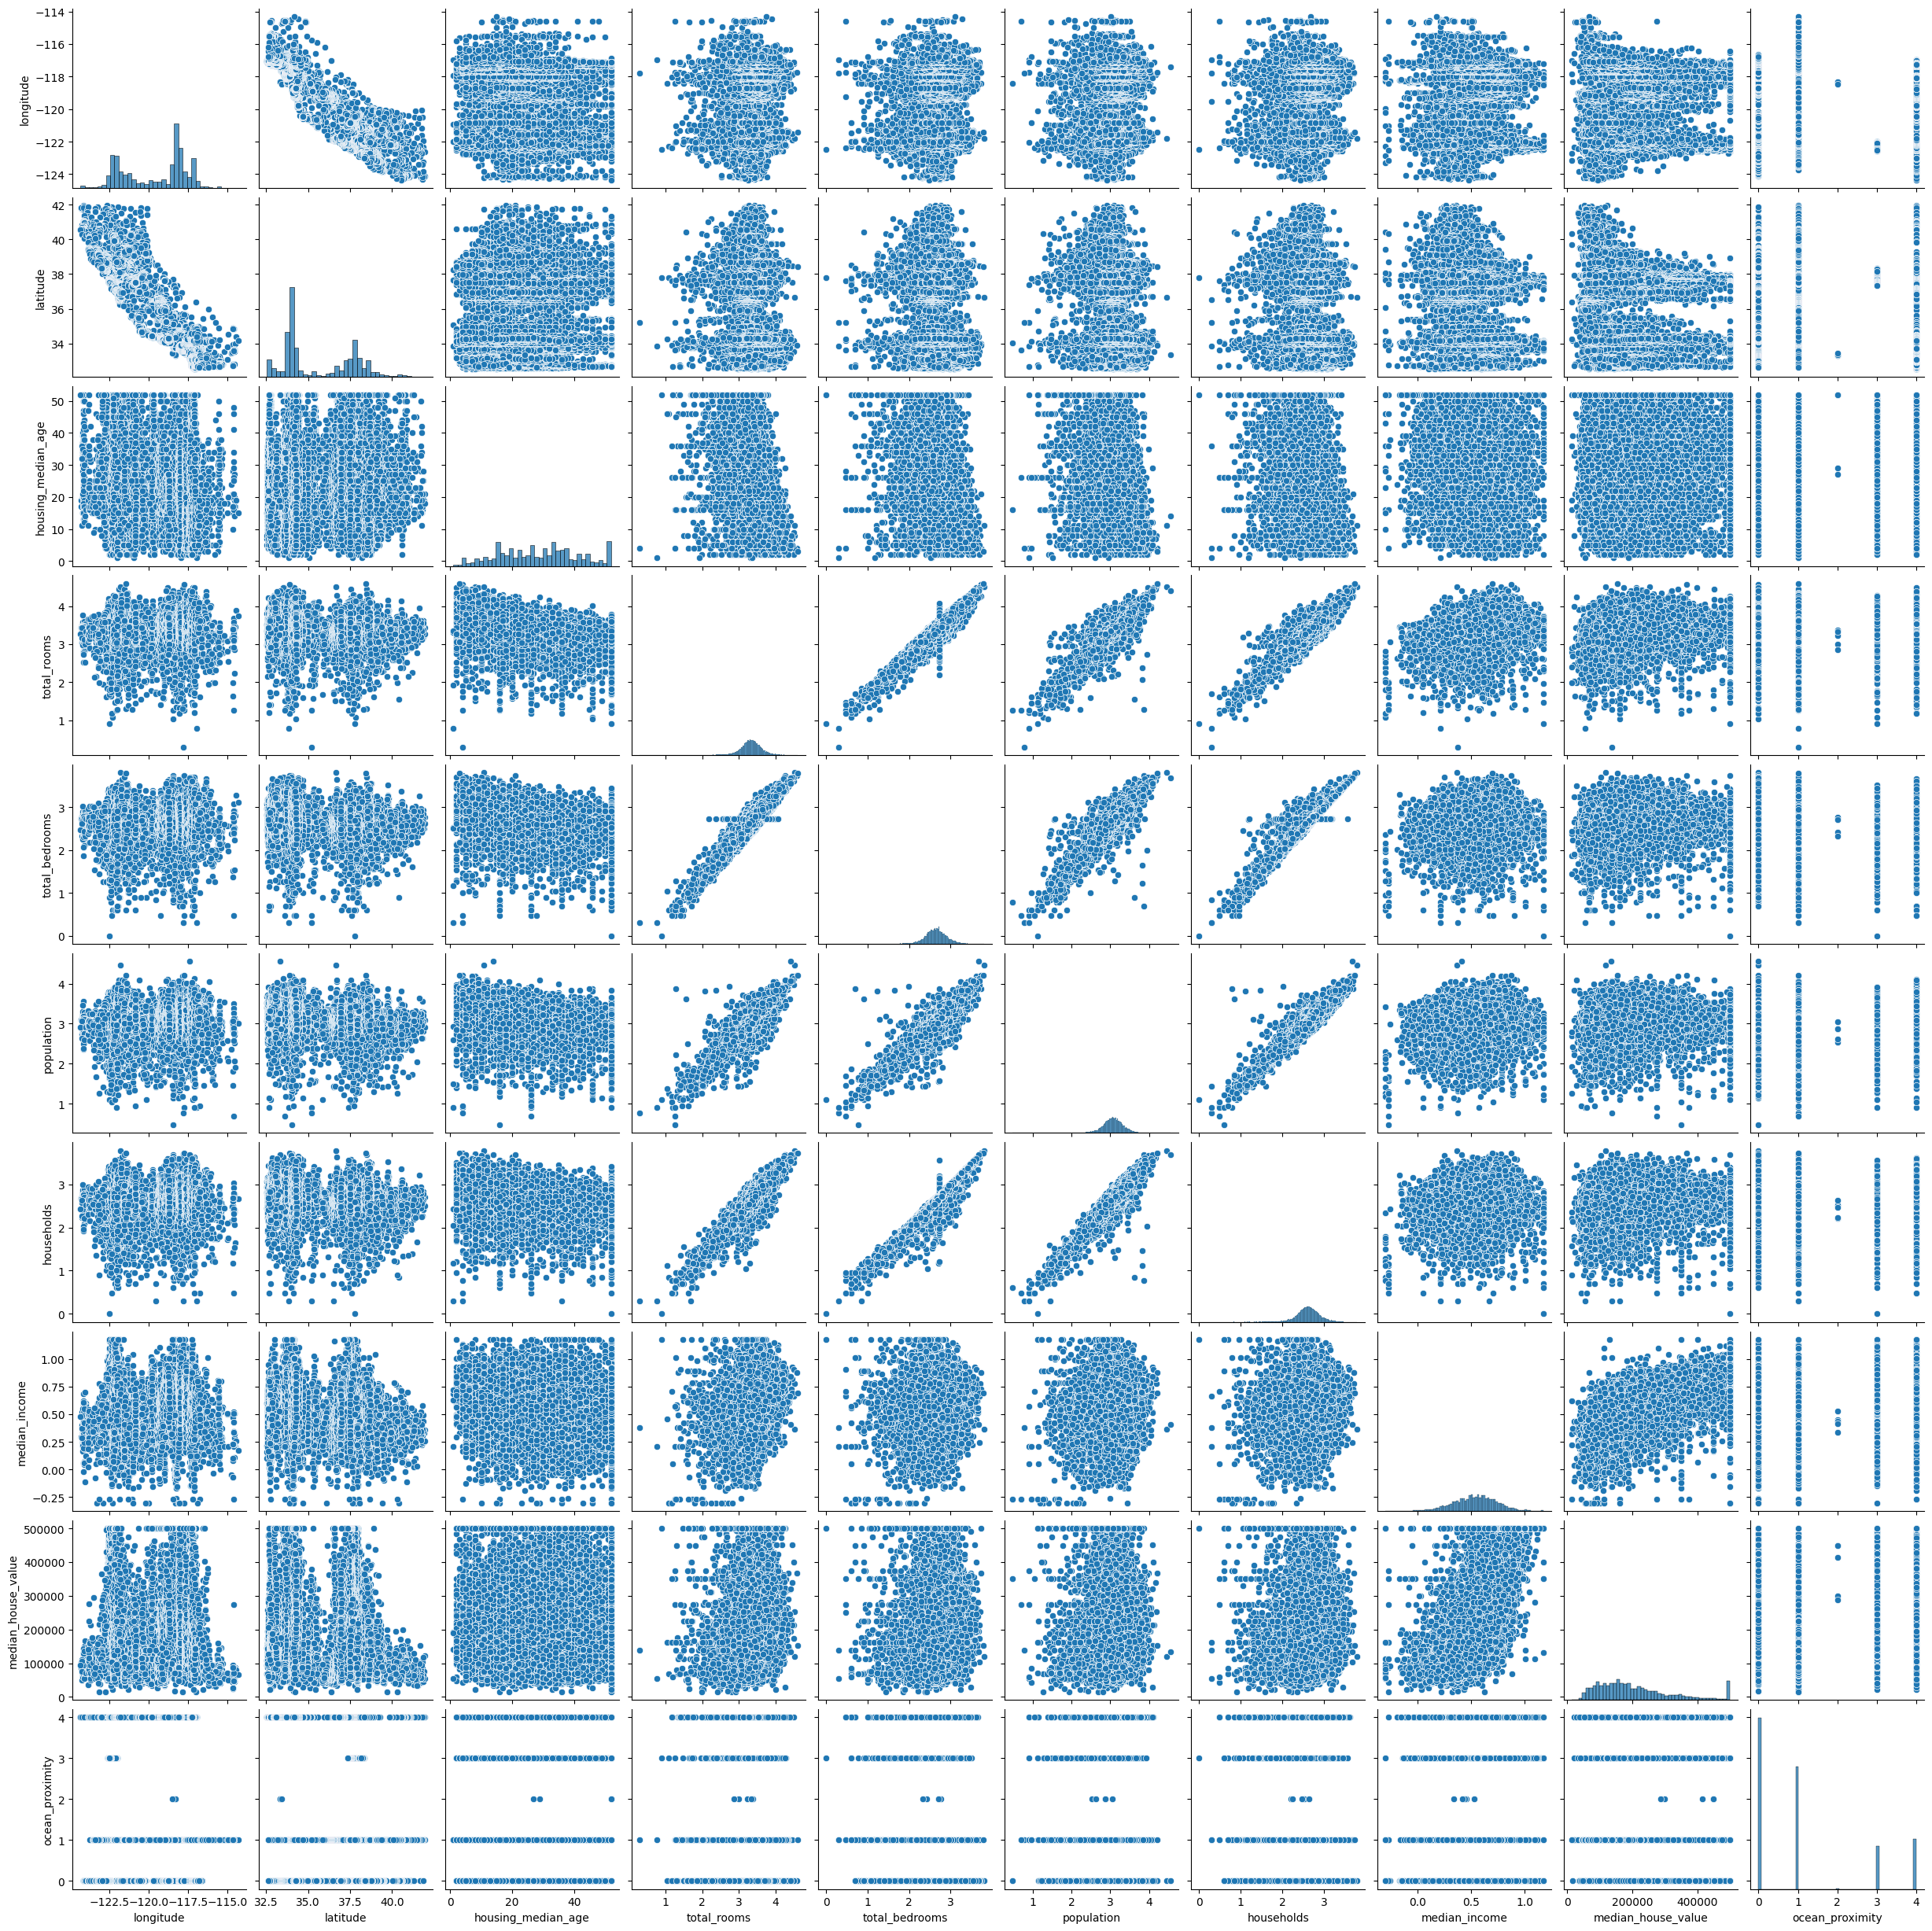

In [20]:
sns.pairplot(df_skew_corrected)
plt.show()

<Axes: >

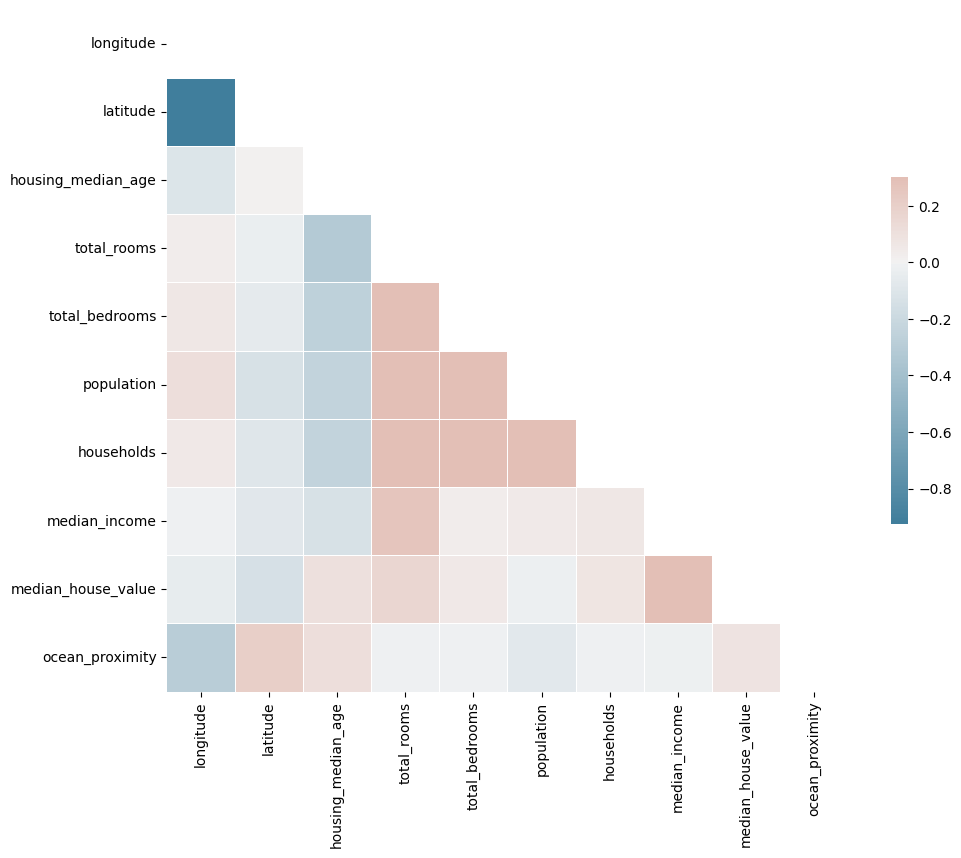

In [21]:

corr = df_skew_corrected.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
from sklearn.preprocessing import StandardScaler

df_skew_corrected.columns

scaler = StandardScaler()
y = df_skew_corrected["median_house_value"]
X = scaler.fit_transform(df_skew_corrected[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households', 'median_income']].values)

print(f"y : {y}")
print(f"X : {X}")

df_scaled = pd.DataFrame(X, columns=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households', 'median_income'])

df_scaled["median_house_value"] = y


df_scaled


y : 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64
X : [[ 0.98214266 -1.1292548  -1.63630027 -1.69201558 -1.56131104  1.85878569]
 [-0.60701891  1.64883898  1.30927438  1.02846086  1.44085341  1.85270275]
 [ 1.85618152 -0.44922729 -1.1054841  -1.10701804 -1.09767769  1.56712981]
 ...
 [-0.92485123  0.12226528  0.17919054 -0.14811634  0.12268151 -1.51673079]
 [-0.84539315 -0.13339053 -0.05445165 -0.56345506 -0.17152068 -1.3174035 ]
 [-1.00430931  0.40375086  0.50696249  0.28541756  0.39843139 -0.79414464]]


housing_median_age  total_rooms  total_bedrooms  population   
0                0.982143    -1.129255       -1.636300   -1.692016  \
1               -0.607019     1.648839        1.309274    1.028461   
2                1.856182    -0.449227       -1.105484   -1.107018   
3                1.856182    -0.636925       -0.814090   -0.947530   
4                1.856182    -0.311482       -0.573909   -0.930649   
...                   ...          ...             ...         ...   
20635           -0.289187    -0.280761       -0.177089   -0.385615   
20636           -0.845393    -1.439476       -1.429542   -1.556094   
20637           -0.924851     0.122265        0.179191   -0.148116   
20638           -0.845393    -0.133391       -0.054452   -0.563455   
20639           -1.004309     0.403751        0.506962    0.285418   

       households  median_income  median_house_value  
0       -1.561311       1.858786            452600.0  
1        1.440853       1.852703            358500.0  
2       -1.097678       1.567130            352100.0  
3       -0.807218       1.032566            341300.0  
4       -0.578372       0.218044            342200.0  
...           ...            ...                 ...  
20635   -0.247885      -1.698929             78100.0  
20636   -1.697841      -0.649557             77100.0  
20637    0.122682      -1.516731             92300.0  
20638   -0.171521      -1.317404             84700.0  
20639    0.398431      -0.794145             89400.0  

[20640 rows x 7 columns]

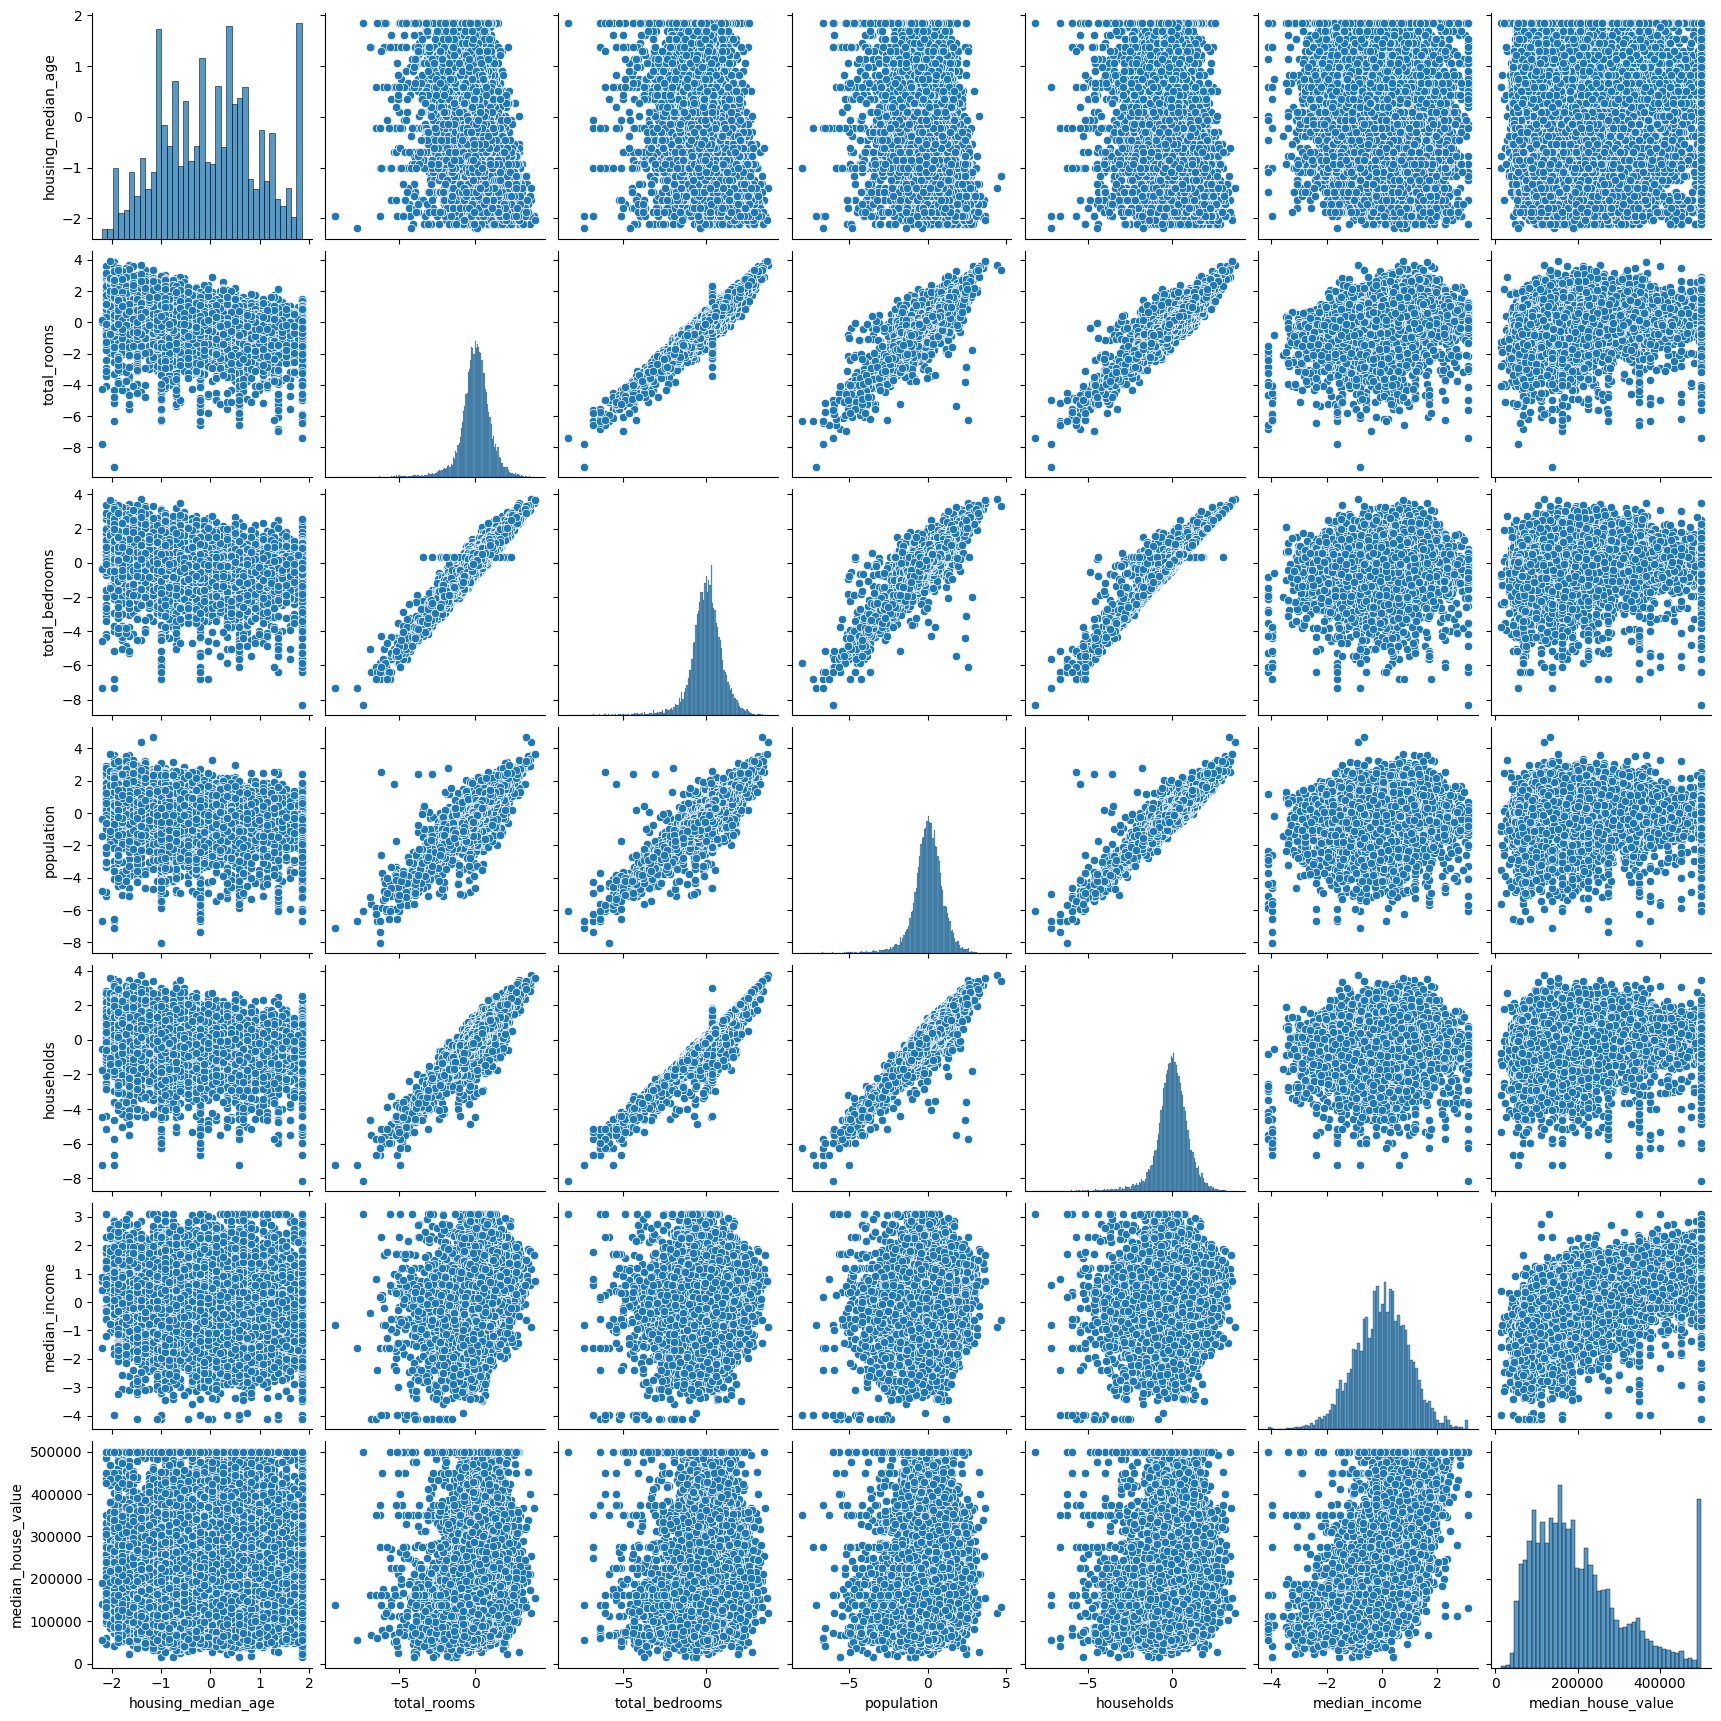

In [23]:

sns.pairplot(df_scaled)
plt.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

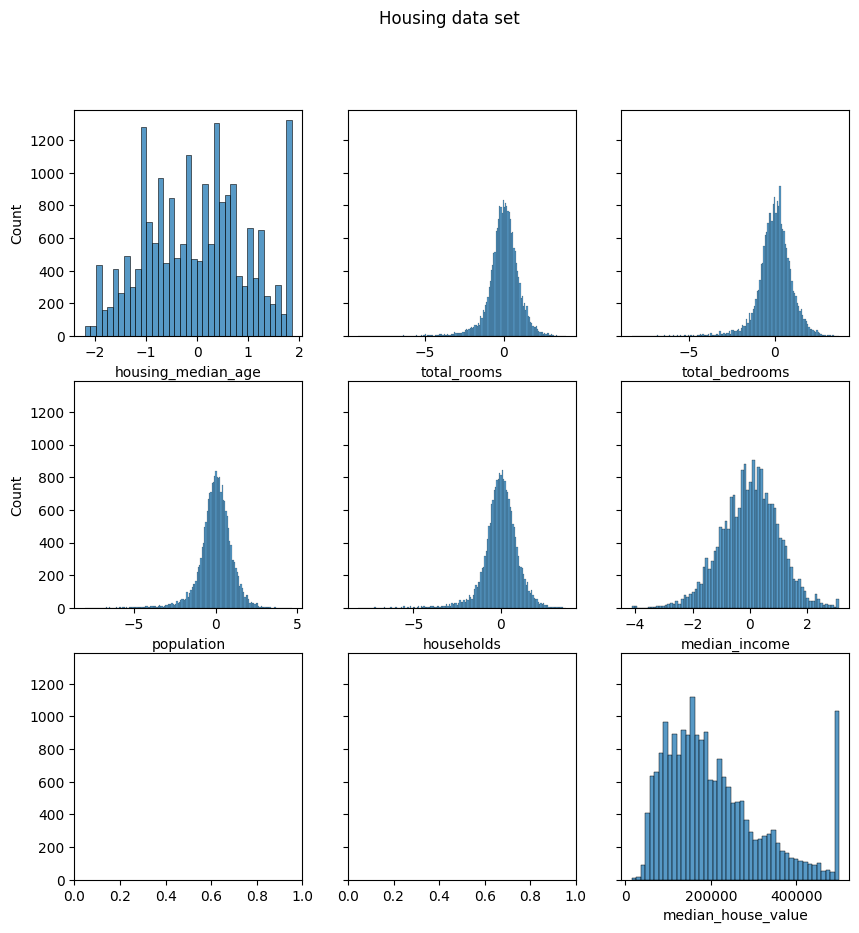

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharey=True)
fig.suptitle('Housing data set')

sns.histplot(df_scaled["housing_median_age"], ax = axes[0][0])
sns.histplot(df_scaled["total_rooms"], ax = axes[0][1])
sns.histplot(df_scaled["total_bedrooms"], ax = axes[0][2])
sns.histplot(df_scaled["population"], ax = axes[1][0])
sns.histplot(df_scaled["households"], ax = axes[1][1])
sns.histplot(df_scaled["median_income"], ax = axes[1][2])
sns.histplot(df_scaled["median_house_value"], ax = axes[2][2])

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
train


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
770      -122.10     37.66                34.0        656.0           115.0  \
14055    -117.13     32.75                23.0       3999.0          1182.0   
17713    -121.80     37.34                20.0       2686.0           414.0   
15387    -117.05     33.29                17.0       1800.0           312.0   
16293    -121.23     37.96                37.0       2351.0           564.0   
...          ...       ...                 ...          ...             ...   
13634    -117.34     34.08                33.0       4924.0          1007.0   
19410    -120.94     37.70                25.0       1005.0           159.0   
1295     -121.81     37.99                18.0       2807.0           445.0   
14911    -117.05     32.61                21.0       6034.0          1205.0   
15294    -117.35     33.17                16.0       4595.0          1341.0   

       population  households  median_income  median_house_value   
770         342.0       112.0         4.6875            200600.0  \
14055      2051.0      1130.0         2.1292            135000.0   
17713      1507.0       405.0         5.8068            263900.0   
15387       891.0       281.0         7.0177            267600.0   
16293      1591.0       549.0         1.6563             57200.0   
...           ...         ...            ...                 ...   
13634      3502.0       953.0         3.2330             99400.0   
19410       390.0       139.0         4.4000            174100.0   
1295       1315.0       437.0         4.8194            170400.0   
14911      3795.0      1146.0         3.2633            129700.0   
15294      2849.0      1197.0         2.4780            185600.0   

       ocean_proximity  
770                  3  
14055                4  
17713                0  
15387                0  
16293                1  
...                ...  
13634                1  
19410                1  
1295                 1  
14911                4  
15294                4  

[16512 rows x 10 columns]

In [26]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train.drop("median_house_value", axis=1), train["median_house_value"])

y_pred = lin_reg.predict(test.drop("median_house_value", axis=1))
y_act = test["median_house_value"].values

# y_pred = pow(10 , y_pred)
# y_act = pow(10 , y_act)

print(y_pred)
print(y_act)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_act, y_pred)
print(f"MSE : {lin_mse}")

from sklearn.metrics import r2_score 
R_square = r2_score(y_act, y_pred)
print('Coefficient of Determination', R_square) 

[221953.7501682  163414.13101718 334129.2419951  ... 210782.36937102
 251499.58071031  74220.63475938]
[198100. 102300. 361400. ... 223100. 188900. 118800.]
MSE : 5162401079.631311
Coefficient of Determination 0.618216309415457


In [28]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,max_depth=30)
clf.fit(train.drop("median_house_value", axis=1), train["median_house_value"])

y_pred = clf.predict(test.drop("median_house_value", axis=1))
y_act = test["median_house_value"].values

# y_pred = pow(10 , y_pred)
# y_act = pow(10 , y_act)

print(y_pred)
print(y_act)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_act, y_pred)
print(f"MSE : {lin_mse}")

from sklearn.metrics import r2_score 
R_square = r2_score(y_act, y_pred)
print('Coefficient of Determination', R_square) 

from sklearn.metrics import explained_variance_score
result=explained_variance_score(y_act,y_pred,multioutput='uniform_average')
print('explained_variance_score', result) 





[197103.16666667 172613.33333333 368843.05       ... 168886.
 216051.51        70167.5       ]
[198100. 102300. 361400. ... 223100. 188900. 118800.]
MSE : 2688441440.116311
Coefficient of Determination 0.801177188851562
explained_variance_score 0.801208756987727


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,max_depth=30)
clf.fit(train.drop("median_house_value", axis=1), train["median_house_value"])

y_pred = clf.predict(test.drop("median_house_value", axis=1))
y_act = test["median_house_value"].values

# y_pred = pow(10 , y_pred)
# y_act = pow(10 , y_act)

print(y_pred)
print(y_act)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_act, y_pred)
print(f"MSE : {lin_mse}")

from sklearn.metrics import r2_score 
R_square = r2_score(y_act, y_pred)
print('Coefficient of Determination', R_square) 

from sklearn.metrics import explained_variance_score
result=explained_variance_score(y_act,y_pred,multioutput='uniform_average')
print('explained_variance_score', result) 